# Imports and deck

In [1]:
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


In [2]:
from bingo import *
from graph import *
from counting import *
from latex import *
from parallel import *

In [3]:
RUNS = 5_000_000
DECKS = list(range(1, 15))
palette = colorblind_palette(len(DECKS))

In [4]:
np.random.seed(56734)

# Quick matcher

In [5]:
%%time

quick_deck_match(100_000, 2, accept_jokers=False)[3]
quick_deck_match(100_000, 3, accept_jokers=False)[3]
quick_deck_match(100_000, 7, accept_jokers=False)[3]


CPU times: user 3.63 s, sys: 32 ms, total: 3.67 s
Wall time: 3.71 s


99.902

In [6]:
%%time

df = quick_deck_matches_on(RUNS, decks=DECKS)
df

CPU times: user 307 ms, sys: 783 ms, total: 1.09 s
Wall time: 4min 21s


,Deck count,Results,Successes,N,Probability
0,1,0 48 1 -1 2 -1 3 ...,3160475,5000000,63.20950
1,2,0 4 1 2 2 32 3 ...,4324330,5000000,86.48660
2,3,0 0 1 0 2 10 3 ...,4750998,5000000,95.01996
3,4,0 5 1 12 2 10 3 ...,4908542,5000000,98.17084
4,5,0 18 1 0 2 1 3 ...,4966225,5000000,99.32450
5,6,0 2 1 1 2 4 3 ...,4987725,5000000,99.75450
6,7,0 4 1 0 2 6 3 ...,4995398,5000000,99.90796
7,8,0 5 1 1 2 2 3 ...,4998318,5000000,99.96636
8,9,0 5 1 7 2 6 3 ...,4999360,5000000,99.98720
9,10,0 9 1 0 2 9 3 ...,4999781,5000000,99.99562


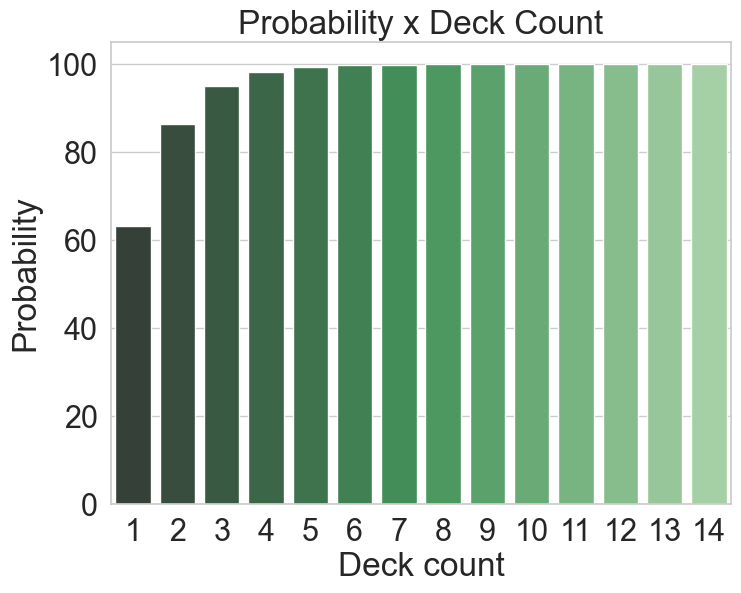

In [7]:
plot_all(df, "Probability")

In [8]:
with_red = palette[0].copy()
with_red[8] = (palette[1])

<Figure size 1400x800 with 0 Axes>

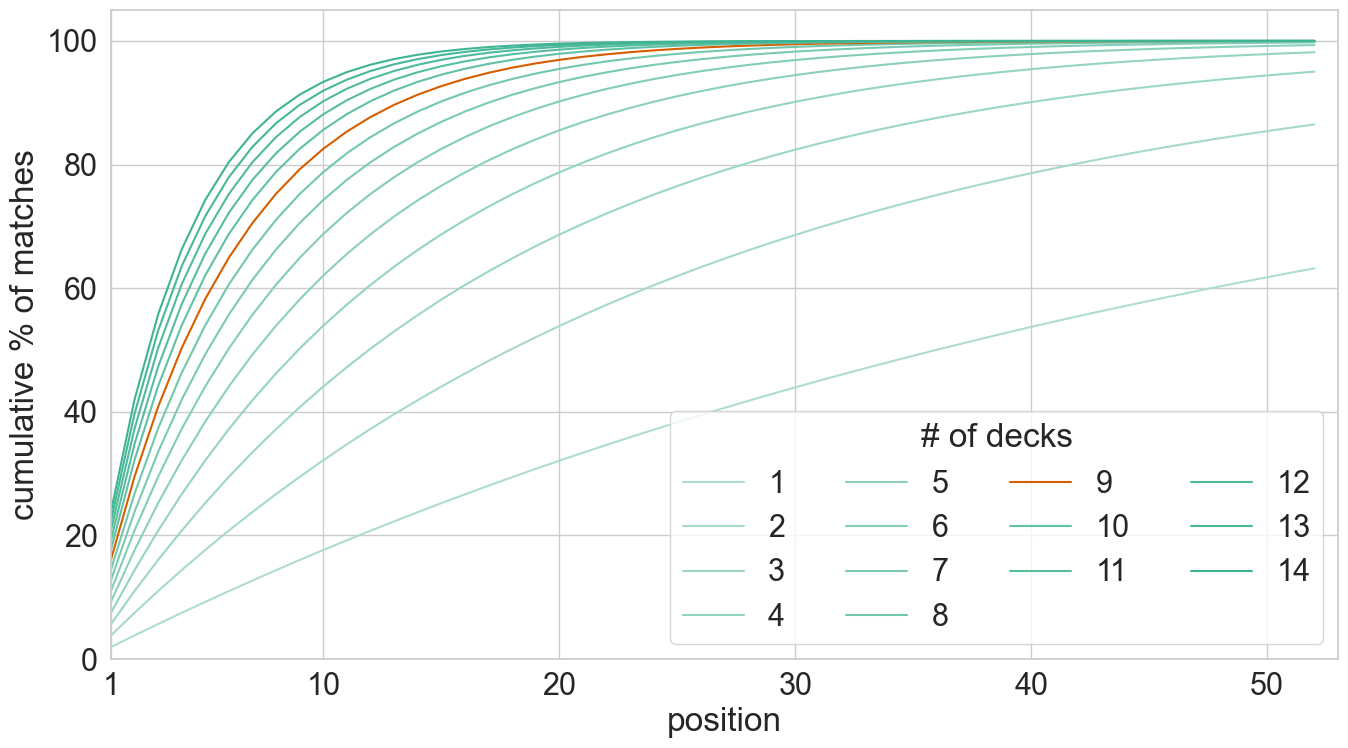

In [9]:
plt.figure(figsize=(14,8))
ax, data = print_cumulative(df, True, xticks=[1, 10, 20, 30, 40, 50], figsize=(14, 8), palette=with_red)

plt.legend(loc='lower right', ncol=4, title="# of decks")
plt.xlim(1, 53)
plt.ylim(0, 105)
ax.set_xlabel("position")
ax.set_ylabel("cumulative % of matches")
plt.tight_layout()

plt.savefig(f"images/fig-the-bingo-miracle.png")
plt.show()

<Figure size 1400x800 with 0 Axes>

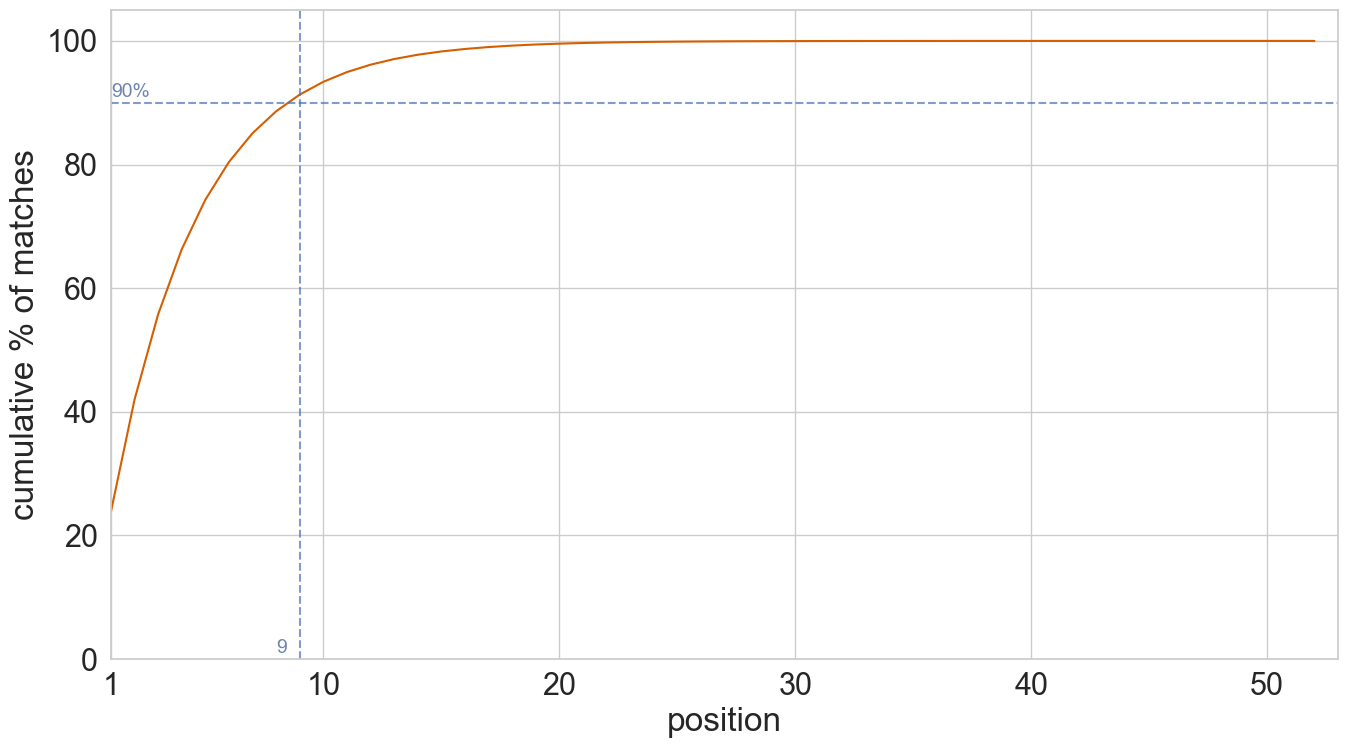

In [10]:
plt.figure(figsize=(14,8))
fourteen = df[df["Deck count"]==14]
ax, data = print_cumulative(fourteen, True, xticks=[1, 10, 20, 30, 40, 50], figsize=(14, 8), palette=[palette[1]])

ax.axhline(y=90, linestyle='dashed', alpha=0.7)
ax.text(y=91, x=1, s='90%', alpha=0.7, color='#334f8d', fontsize=14)

ax.axvline(x=9, linestyle='dashed', alpha=0.7)
ax.text(y=1, x=8, s='9', alpha=0.7, color='#334f8d', fontsize=14)

plt.xlim(1, 53)
plt.ylim(0, 105)
ax.get_legend().remove()
ax.set_xlabel("position")
ax.set_ylabel("cumulative % of matches")
plt.tight_layout()

plt.savefig(f"images/fig-the-bingo-miracle-14.png")
plt.show()

In [11]:

prob_table_to_latex(df, name="the-bingo-miracle")

\begin{table}[tb]
\label{tbl:the-bingo-miracle}
\begin{tabular}{llll}
\toprule
 & Probability & CI lower & CI upper \\
Decks &  &  &  \\
\midrule
1 & 63.209% & 63.167% & 63.252% \\
2 & 86.487% & 86.457% & 86.517% \\
3 & 95.020% & 95.001% & 95.039% \\
4 & 98.171% & 98.159% & 98.183% \\
5 & 99.325% & 99.317% & 99.332% \\
6 & 99.755% & 99.750% & 99.759% \\
7 & 99.908% & 99.905% & 99.911% \\
8 & 99.966% & 99.965% & 99.968% \\
9 & 99.987% & 99.986% & 99.988% \\
10 & 99.996% & 99.995% & 99.996% \\
11 & 99.998% & 99.998% & 99.999% \\
12 & 100.000% & 99.999% & 100.000% \\
13 & 100.000% & 100.000% & 100.000% \\
14 & 100.000% & 100.000% & 100.000% \\
\bottomrule
\end{tabular}
\end{table}

